## 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\mgril\OneDrive\Desktop\UFC project folder'

In [4]:
# import UFC data set
df_UFC = pd.read_csv(os.path.join(path,  'Prepared data UFC', 'UFC_wrangled_new.csv'), index_col = False)

In [5]:
df_UFC.shape

(5748, 40)

In [6]:
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,...,r_win_tko,r_win_tko_actual,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,97,Vitor Belfort,Tra Telligman,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,1,1,0,0,Southpaw,182.88,176.0,185,32,19
1,98,Mark Coleman,Dan Severn,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,3,0,2,0,Orthodox,185.42,193.0,205,38,32
2,99,Jerry Bohlander,Nick Sanzo,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,0,0,2,0,Orthodox,180.34,193.0,199,30,22
3,102,Jerry Bohlander,Rainy Martinez,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,0,0,1,0,Orthodox,180.34,176.0,199,30,22
4,103,Yoshiki Takahashi,Wallid Ismail,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,0,0,0,0,Southpaw,180.34,169.0,199,28,27


In [7]:
#remove unamed columns
df_UFC = df_UFC.drop(columns = ['Unnamed: 0'])

In [8]:
# check unnamed column dropped 
df_UFC.head()

,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,b_winner,...,r_win_tko,r_win_tko_actual,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,Vitor Belfort,Tra Telligman,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,0,...,1,1,0,0,Southpaw,182.88,176.0,185,32,19
1,Mark Coleman,Dan Severn,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,0,...,3,0,2,0,Orthodox,185.42,193.0,205,38,32
2,Jerry Bohlander,Nick Sanzo,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,0,...,0,0,2,0,Orthodox,180.34,193.0,199,30,22
3,Jerry Bohlander,Rainy Martinez,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,0,...,0,0,1,0,Orthodox,180.34,176.0,199,30,22
4,Yoshiki Takahashi,Wallid Ismail,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,0,...,0,0,0,0,Southpaw,180.34,169.0,199,28,27


In [9]:
# Check the column names 

df_UFC.columns

Index(['r_fighter', 'b_fighter', 'date_of_fight', 'year_of_fight', 'city',
       'state', 'country', 'winner', 'r_winner', 'b_winner', 'weight_class',
       'b_wins', 'b_losses', 'b_win_maj', 'b_win_split', 'b_win_unam',
       'b_win_tko', 'b_win_tko_actual', 'b_win_sub', 'b_win_dr_stop',
       'b_stance', 'b_height_cms', 'b_reach_cms', 'b_weight_lbs', 'r_wins',
       'r_losses', 'r_win_maj', 'r_win_split', 'r_win_unam', 'r_win_tko',
       'r_win_tko_actual', 'r_win_sub', 'r_win_dr_stop', 'r_stance',
       'r_height_cms', 'r_reach_cms', 'r_weight_lbs', 'b_age', 'r_age'],
      dtype='object')

## 03. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [25]:
# Create a subset which contains only the Numerical variables related to wins and losses related to age and weight

sub = df_UFC[['r_height_cms', 'b_height_cms','r_win_tko','b_win_tko', 'r_weight_lbs', 'b_weight_lbs', 'b_age', 'r_age']]

In [26]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [27]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

C:\Users\mgril\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgril\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgril\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgril\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-14912726.502745442,
 -5904100.951602792,
 -2998492.1994685996,
 -1986128.5740141121,
 -1489597.4025304154,
 -1313270.9345832737,
 -1183736.9812295737,
 -1096187.329954506,
 -1024345.5680502927]

## 04. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.
If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

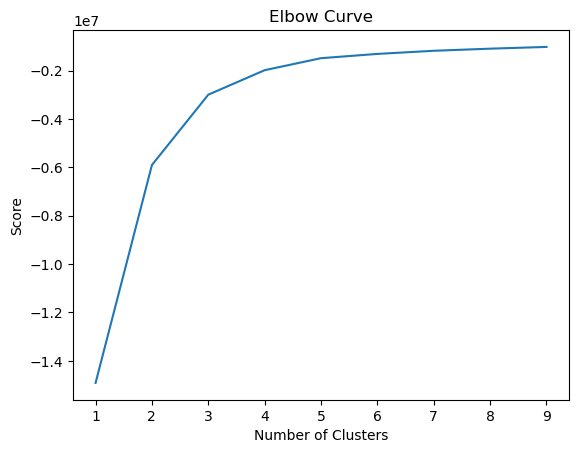

In [28]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The elbow (the breaking point of the curve) is where the curve begins to flatten. We can observe that it jumps from two to three on the X-axis and then increases slightly after three. That's why I believe that the optimal number of clusters is three.

## 05. Run the k-means algorithm.

In [29]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [30]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\mgril\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [31]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\mgril\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgril\AppData\Local\Temp\ipykernel_28464\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


## 06. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [32]:
sub.head()

,r_height_cms,b_height_cms,r_win_tko,b_win_tko,r_weight_lbs,b_weight_lbs,b_age,r_age,clusters
0,182.88,187.96,1,0,185,233,32,19,2
1,185.42,187.96,3,0,205,250,38,32,0
2,180.34,175.26,0,0,199,190,30,22,2
3,180.34,182.88,0,0,199,199,30,22,2
4,180.34,170.18,0,0,199,205,28,27,2


In [33]:
# Check the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

clusters
1    2627
2    2548
0     573
Name: count, dtype: int64

## 07. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

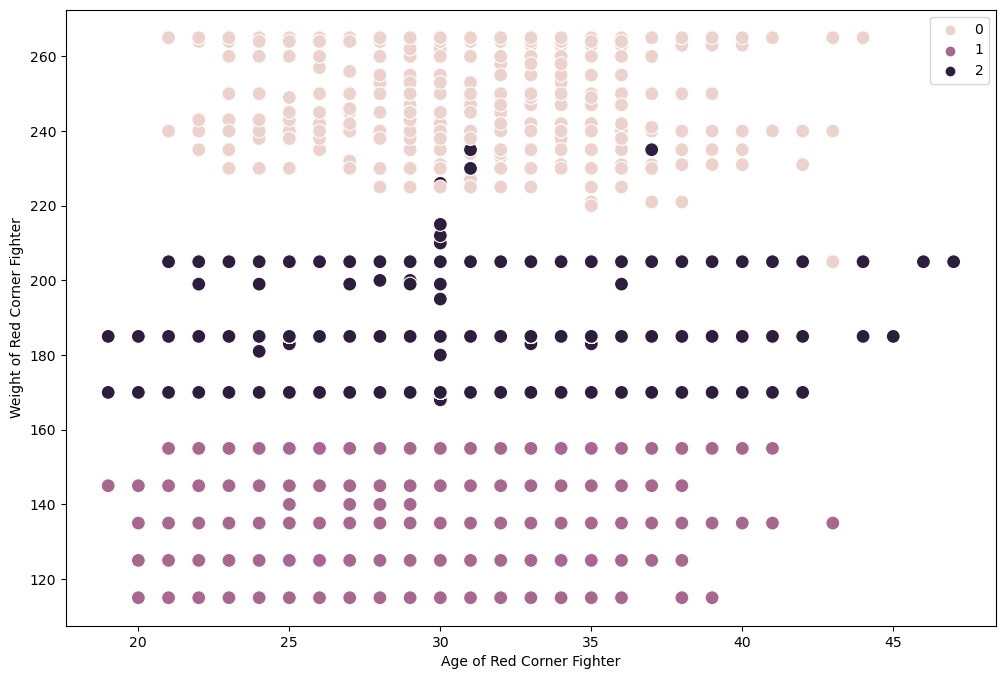

In [34]:
# Plot the clusters for the "r_age" and "r_weight_lbs" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['r_age'], y = sub['r_weight_lbs'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Red Corner Fighter')
plt.ylabel('Weight of Red Corner Fighter')
plt.show()


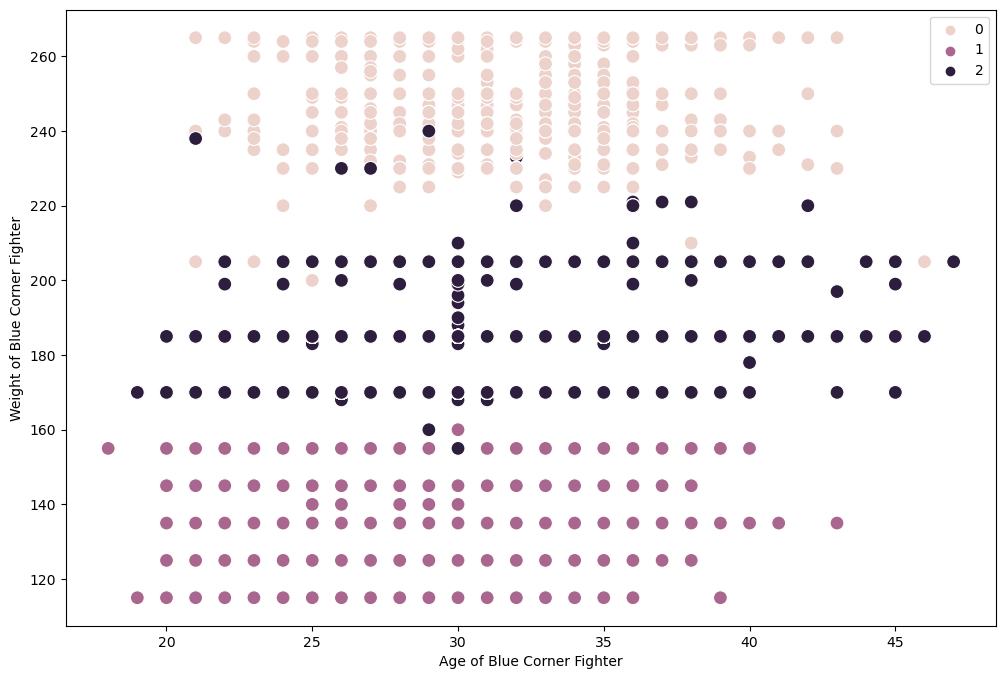

In [35]:
# Plot the clusters for the "r_age" and "r_weight_lbs" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['b_age'], y = sub['b_weight_lbs'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Blue Corner Fighter')
plt.ylabel('Weight of Blue Corner Fighter')
plt.show()

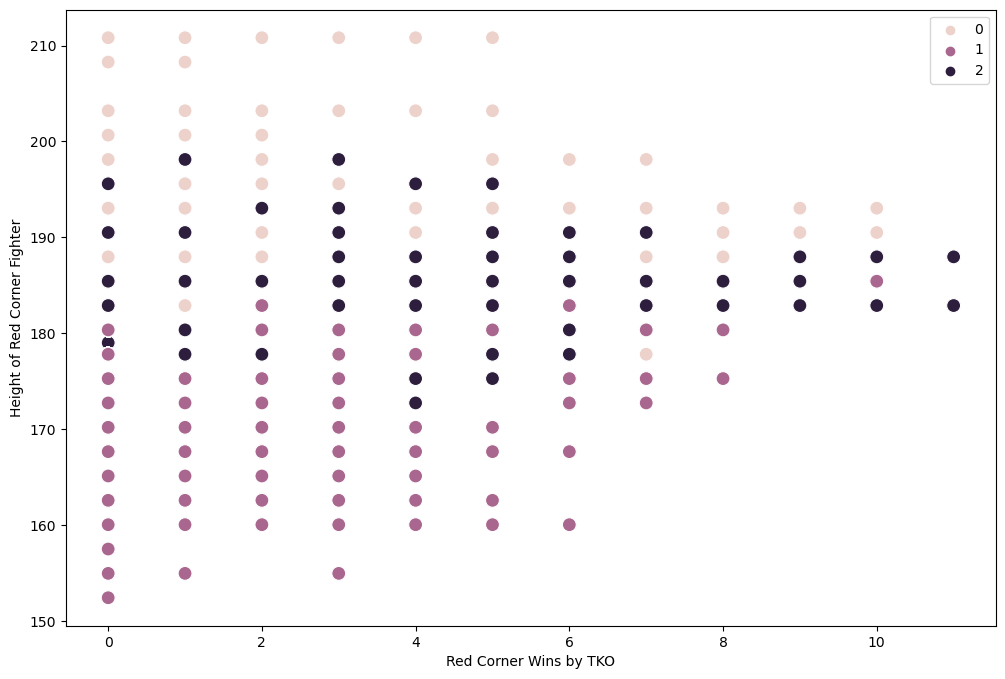

In [40]:
# Plot the clusters for the "r_age" and "r_weight_lbs" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['r_win_tko'], y = sub['r_height_cms'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Red Corner Wins by TKO')
plt.ylabel('Height of Red Corner Fighter')
plt.show()

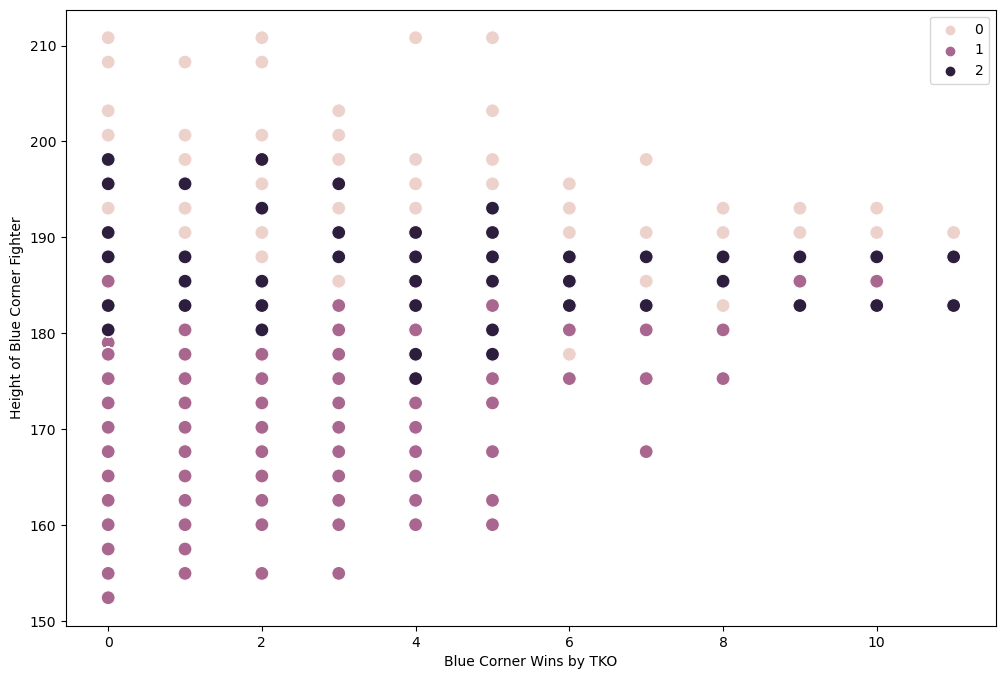

In [41]:
# Plot the clusters for the "r_age" and "r_weight_lbs" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['b_win_tko'], y = sub['b_height_cms'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Blue Corner Wins by TKO')
plt.ylabel('Height of Blue Corner Fighter')
plt.show()

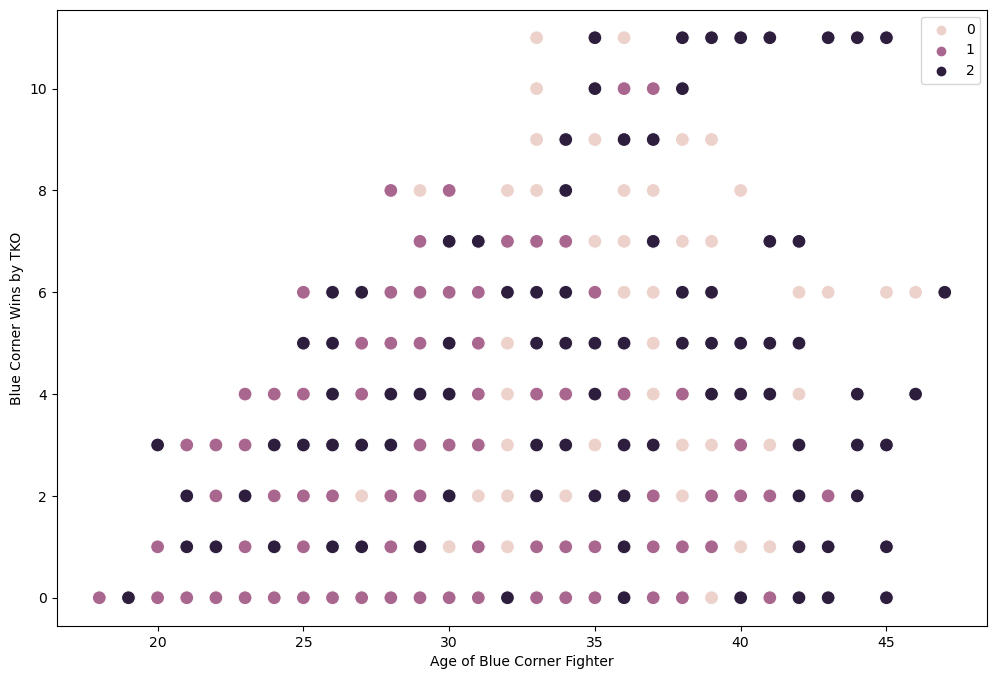

In [44]:
# Plot the clusters for the "r_age" and "r_weight_lbs" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['b_age'], y = sub['b_win_tko'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Blue Corner Fighter')
plt.ylabel('Blue Corner Wins by TKO')
plt.show()

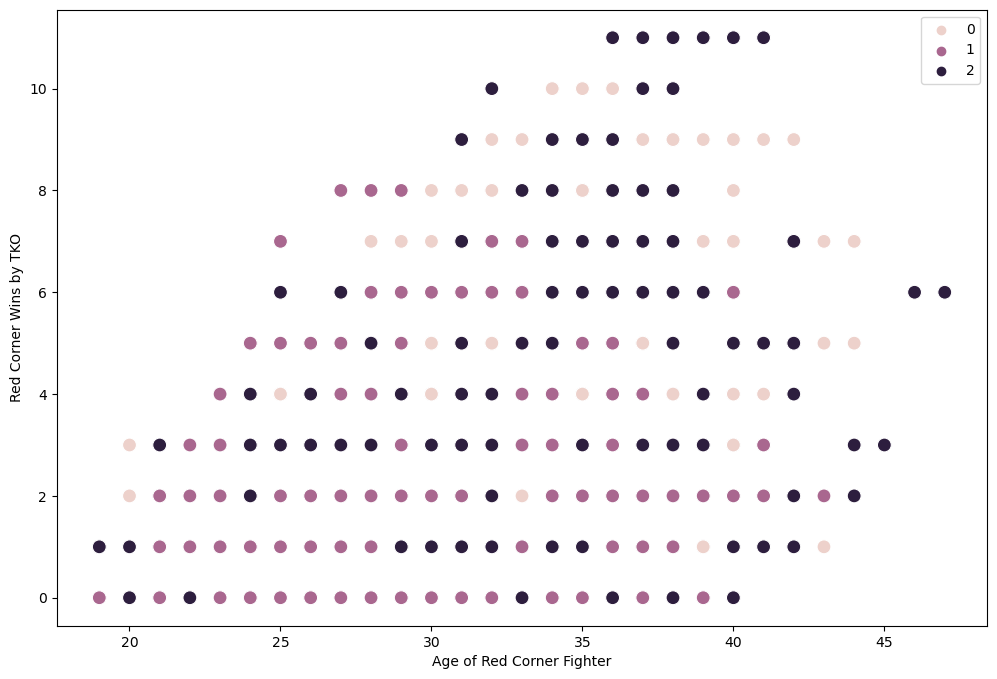

In [45]:
# Plot the clusters for the "r_age" and "r_weight_lbs" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['r_age'], y = sub['r_win_tko'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Age of Red Corner Fighter')
plt.ylabel('Red Corner Wins by TKO')
plt.show()

## 08. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

### This is an highly unpredicatable dataset. The sport of UFC is in general very unpredicatable. Fighters are constantly changing weight, stance, fighting style, which corner they fight in depending on if they have the higher or lower record indicating red or blue corner designation. The fights themselves are very unpredicatble and someone even the lesser fighter can win by a knockout tko at any given moment for numerous variables coming into play. So looking at the above clusters it does make sense they are also scattered and not highly discernable. Weight vs. Age of blue and red corner fighters for example. You can see the highest clustering between 30-35 for all cluster groups and makes sense as previously explored this is the highest average age group. The clustering is tightest in the 0 cluster which could indicate the highest weight class also has the highest rate of weight differences. The 2 cluster in both you can also decipher that there is far less clustering as these are the weight classes most specific to needed to have a specific weight to fight and highest average of fights. You can also see being the most popular range of weight classes it also spans the oldest ages over other clusters. The height and wins by TKO you can see that if you are very tall or very short you have the least amount of wins by TKO. The 2 cluster has the highest amount of TKO's so the height range of both blue and red between 180-190 cms is of interest. The age of the fighter red and blue corner and wins by TKO clusters is very sporadic. The 2 cluster has teh highest tko's for both corners and fits within the range of 35-45 which could be simply correlatting with time and experince you will clearly have higher TKO's than someone young and less experienced. It is really difficult to make sense of this as the clustering is just not there. 0,1, & 2 groups spread all over the place.

## 09. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [46]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\mgril\AppData\Local\Temp\ipykernel_28464\2493361149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'


In [47]:
sub.groupby('cluster').agg({'r_age':['mean', 'median'], 
                         'b_age':['mean', 'median'], 
                         'r_win_tko':['mean', 'median'],
                         'b_win_tko':['mean', 'median'], 
                         'r_weight_lbs':['mean', 'median'], 
                         'b_weight_lbs':['mean', 'median'], 
                          'r_height_cms':['mean', 'median'],                            
                          'b_height_cms':['mean', 'median']})

r_age             b_age        r_win_tko        b_win_tko         \
              mean median       mean median      mean median      mean median   
cluster                                                                         
dark     29.860675   30.0  29.594584   29.0  1.512559    1.0  1.040031    0.0   
pink     31.258290   31.0  31.143106   31.0  2.319372    1.0  1.691099    1.0   
purple   28.926532   29.0  28.657404   29.0  0.891892    0.0  0.591930    0.0   

        r_weight_lbs        b_weight_lbs        r_height_cms          \
                mean median         mean median         mean  median   
cluster                                                                
dark      181.434851  185.0   181.145604  185.0   183.321028  182.88   
pink      245.924956  246.0   244.443281  247.0   190.260628  190.50   
purple    141.452227  145.0   141.269509  145.0   172.081858  172.72   

        b_height_cms          
                mean  median  
cluster                       
dark      183.058799  182.88  
pink      189.932600  190.50  
purple    172.332227  172.72

### Based on these statistics, it is difficult to conclude which cluster is the most accurate at giving insight into the data between mean and median range for variables. The pink cluster seems the most accurate and reliable until the height of red and blue fighter which varies far more than the purple and dark cluster which are close together showing little variation. Pink also has the highest variation with red and blue tko mean to median compared to dark and purple clusters. Overall this is consistent with question 8 findings that this data set has large variations between most variables. It does make sense based on the nature of UFC fighters and the sport itself being very unpredictable in outcomes. I have watched UFC as a dedicated fan for over 20 years and have seen some of the most unpredictable outcomes out of any sport hence my curiosity to study this data to see what insights could be statistically unravelled. 

## Propose what these results could be useful for in future steps of an analytics pipeline.

### I believe what the results are showing currently is indicating a need for further analysis of those variables that are wide ranging and hard to predict with certainty in future outcomes. Possibly a need to explore a combination of other variables or removing certain ones completely for better analysis. This data set originally had 144 columns which means it could always be reviewed down the line for deeper analysis through trial and error as example running predictive models in training and test mode. The data set has already been narrowed down greatly due to outliers such as older weight classes being removed that no longer exist in the UFC like openweight class and catchweight. These had far ranging variables as any weight could fight any weight as opposed to weight classes now stating you specifically have to meet similar weights to fight that class. I think the most important analysis of the data so far from a marketing standpoint is to understand what fighters by weight class and age are the most popular. That has been investigated and narrowed down to the 30 year old age group of 170 pd weight class. The question still remains though of why is this a statistical focus point. Marketing wise why is this age group and weight so popular. Possibly research the top 3 weight classes to see who viewers watch the most for markerting and talent search. 